In [492]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.fft import rfft, rfftfreq
from scipy.integrate import solve_ivp
import os
from python_code.nord_cmap import * 

In [493]:
files = sorted([file for file in os.listdir("./") if file.endswith(".csv")])

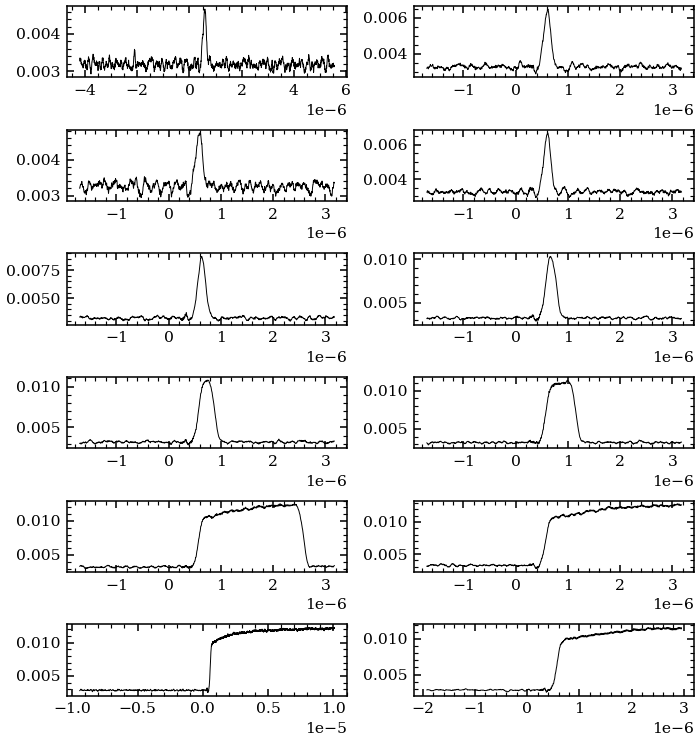

In [494]:
fig, ax = plt.subplots(len(files[3:-3])//2,2, figsize=(5,5.3))
for i,file in enumerate(files[3:-3]) : 
    X,Y = np.loadtxt(file, delimiter=',', unpack=True, skiprows=2, max_rows=1950)
    ax[i //2, i%2].plot(X,Y, label=file.split('.')[0], lw = .5, color = 'k')

In [495]:
from scipy.signal import savgol_filter

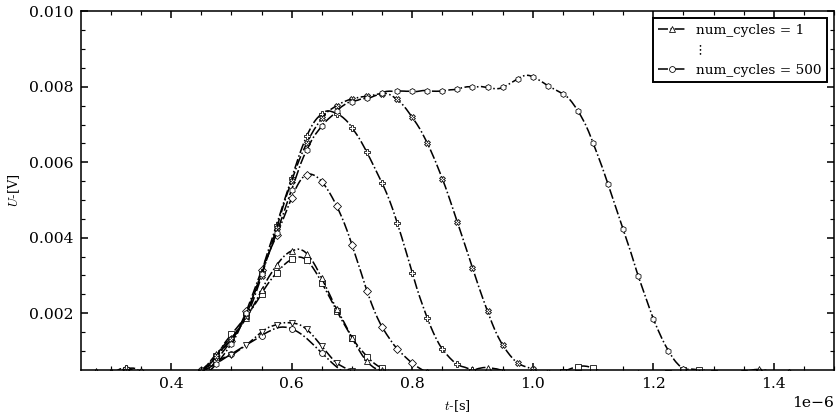

In [505]:
fig, ax = plt.subplots(figsize=(6,3))
color = color_list(len(files[3:-7]))
marker = ['o', 's', 'v', '^', 'D', 'P', 'X', 'h', 'p', '8', 'd', '*']
for i,file in enumerate(files[3:-7]) : 
    X,Y = np.loadtxt(file, delimiter=',', unpack=True, skiprows=2, max_rows=1950)
    Y = savgol_filter(Y, 30, 2)
    ax.plot(X,Y - Y.min(), '-.', lw = .8, color ='k',marker = marker[i],  markevery = 10, ms = 3, mec = 'k', mfc = 'w', mew = .4)

ax.set_xlim(.025e-5,1.5e-6)
ax.set_ylim(0.0005, 0.01)
ax.set_xlabel(r'$t$-[s]')
ax.set_ylabel(r'$U$-[V]')
ax.plot([], [], '-.', lw = .8, color ='k',marker = marker[3],  markevery = 10, ms = 3, mec = 'k', mfc = 'w', mew = .4, label = 'num_cycles = 1')
ax.plot([], [], '-', lw = 0, label = '$\\vdots$')
ax.plot([], [], '-.', lw = .8, color ='k',marker = marker[0],  markevery = 10, ms = 3, mec = 'k', mfc = 'w', mew = .4, label = 'num_cycles = 500')

ax.legend(loc = 'best', fontsize = 7)
plt.savefig('nmbr_cycles.png', dpi = 300, bbox_inches='tight')

In [477]:
def equation(x,a,tau, x_0, c) : 
    return a * (1-np.exp(-(x-x_0)/tau)) + c

In [486]:
p_0 = [.001,10 **(-7),  .2 * 10 **(-6),.0025]

In [487]:
X,Y = np.loadtxt(files[-5], delimiter=',', unpack=True, skiprows=2, max_rows=1950)
threshold = .79 * 10 **(-6)
mask = X > threshold
p_opt, p_cov = curve_fit(equation, X[mask], Y[mask], p0= p_0)


In [488]:
X_fit = np.linspace(threshold, X.max(), 1000)
sigma = np.sqrt(np.sum(np.diag(p_cov)[[1,2]]))

In [489]:
sigma

0.008862457413934642

In [490]:
p_cov

array([[ 1.40080076e+06,  5.28516732e-07, -1.04891995e+01,
        -1.40080076e+06],
       [ 5.28516732e-07,  9.29968896e-16, -3.96217956e-12,
        -5.28516583e-07],
       [-1.04891995e+01, -3.96217956e-12,  7.85431514e-05,
         1.04891995e+01],
       [-1.40080076e+06, -5.28516583e-07,  1.04891995e+01,
         1.40080077e+06]])

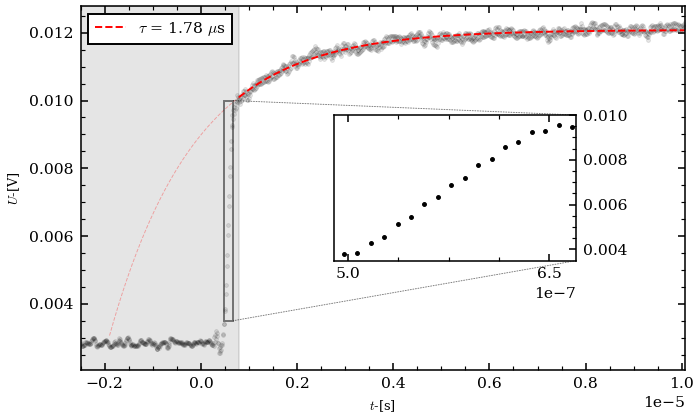

In [491]:
fig, ax = plt.subplots(1,1, figsize=(5,3))
ax.plot(X, Y, 'o', markersize = 2, mfc = (0,0,0,0), mec = 'k', mew = .5, alpha = .1)
ax.plot(X_fit, equation(X_fit, *p_opt),'--', lw = 1, color = 'r', label = '$\\tau$ = %.2f $\\mu$s' % (p_opt[1] * 10 **6))

x_2 = np.linspace(-1.9e-6, threshold, 1000)
ax.plot(x_2, equation(x_2, *p_opt),'--', lw = .5, color = 'r', alpha = .3)

ax.axvspan(-1e-5, threshold, color = 'k', alpha = .1)
ax.set_xlim(-.25e-5, X.max())
ax.legend()
ax.set_xlabel(r'$t$-[s]')
ax.set_ylabel(r'$U$-[V]')
x1, x2, y1, y2 = threshold - 3e-7, threshold - 1.2e-7, 0.0035, 0.01 # subregion of the original image
axins = ax.inset_axes(
    [0.42, 0.3, 0.4, 0.4],
    xlim=(x1, x2), ylim=(y1, y2))
mask = abs(X - 10e-7) < threshold
axins.plot(X[mask], Y[mask], 'o', markersize = 2, mfc = (0,0,0,0), mec = 'k', mew = .5, alpha = 1)
axins.yaxis.tick_right()
r, c = ax.indicate_inset_zoom(axins, edgecolor="black", lw = 1)
for connector in c : 
    connector.set_linestyle(':')
    connector.set_linewidth(.5)

axins.set_xticks([5e-7, 6.5e-7])
plt.savefig('tau.png', dpi = 300, bbox_inches='tight')

- Tableau 0 : Aucune idée de ce que c
- Tableau 1 : Montée exponentielle observée pour un temps long
- Tableau 2 : Montée exponentielle observée pour un temps assez long
- Tableau 3 : Montée exponentielle 1
- Tableau 4 : Montée exponentielle 2
- Tableau 5 : Montée exponentielle 3
- Tableau 6 : Montée exponentielle 4
- Tableau 7 : Montée exponentielle 5
- Tableau 8 : Montée exponentielle 6
- Tableau 9 : Montée exponentielle 7
- Tableau 10 : Montée exponentielle 8
- Tableau 11 : Montée exponentielle 9
- Tableau 12 : Montée exponentielle 10
- Tableau 13 : Montée exponentielle 11
- Tableau 14 : Montée exponentielle qui ressemble à tableau
- Tableau 15 : Montée exponentielle avec bcp de cycles (temps long) mais observé très proche du temps 0
- Tableau 16 : Signal créneau qui correspond à notre signal de trig
- Tableau 17 : Aucune idée

Il nous faut encore le signal envoyé à l'AOM, pas seulement le créneau de trig mais les 2 pour pouvoir 
les superposer (je pensais que qd on sauvegardait on avait tout ce qui est affiché à l'écran mais non)

scope_6.csv
scope_7.csv
scope_8.csv
scope_9.csv

In [506]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.fft import rfft, rfftfreq
from scipy.integrate import solve_ivp
import os
from python_code.nord_cmap import * 

In [507]:
files = sorted([file for file in os.listdir("./Zeeman/") if file.endswith(".csv")])

Text(0.5, 1.0, 'nbr de cycles')

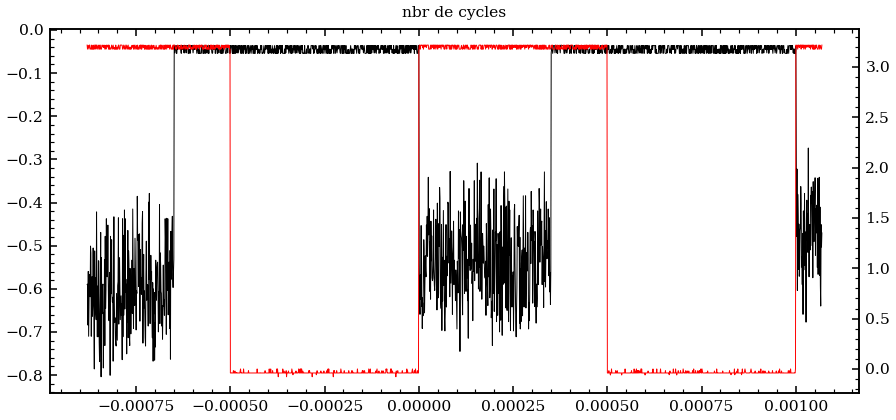

In [508]:
fig, ax = plt.subplots()
data = np.loadtxt("./Zeeman/" + files[0], delimiter=',', unpack=True, skiprows=2, max_rows=1950)
ax.plot(data[0], data[2], lw = .5, color = 'k')
ax2 = ax.twinx()
ax2.plot(data[0], data[1], lw = .5, color = 'r')
ax.set_title('nbr de cycles')

Pareil pour les 2 autres 

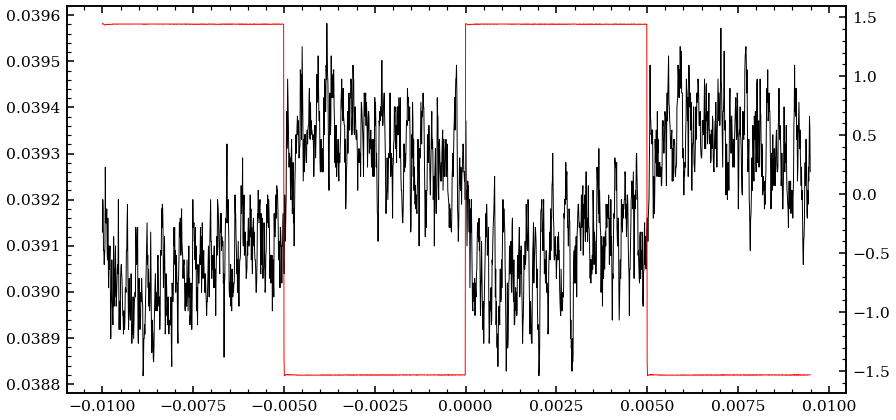

In [509]:
fig, ax = plt.subplots()
data = np.loadtxt("./Zeeman/" + files[3], delimiter=',', unpack=True, skiprows=2, max_rows=1950)
ax.plot(data[0], data[2], lw = .5, color = 'k')
ax2 = ax.twinx()
ax2.plot(data[0], data[1], lw = .5, color = 'r')


In [603]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.fft import rfft, rfftfreq
from scipy.integrate import solve_ivp
import os
from python_code.nord_cmap import * 

In [604]:
files = sorted([file for file in os.listdir("./Zeeman/theta") if file.endswith(".csv")])

In [605]:
theta = np.arange(0, 360, 20)

In [606]:
theta_file = files[1:]

In [607]:
theta_file = [[theta_file[k], theta_file[k +  len(files) // 2]] for k in range(len(theta_file) // 2)]
theta_file = np.concatenate(theta_file)

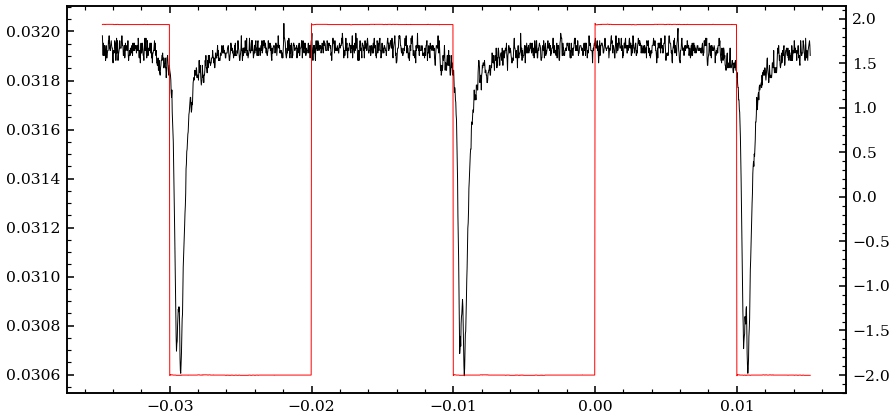

In [608]:
fig, ax = plt.subplots()
data = np.loadtxt("./Zeeman/theta/" + files[0], delimiter=',', unpack=True, skiprows=2)
ax.plot(data[0], data[2], label=f'$\theta = {theta[0]:.1f}$', lw = .5, color = 'k')
ax2 = ax.twinx()
ax2.plot(data[0], data[1], label=f'$\theta = {theta[0]:.1f}$', lw = .5, color = 'r')

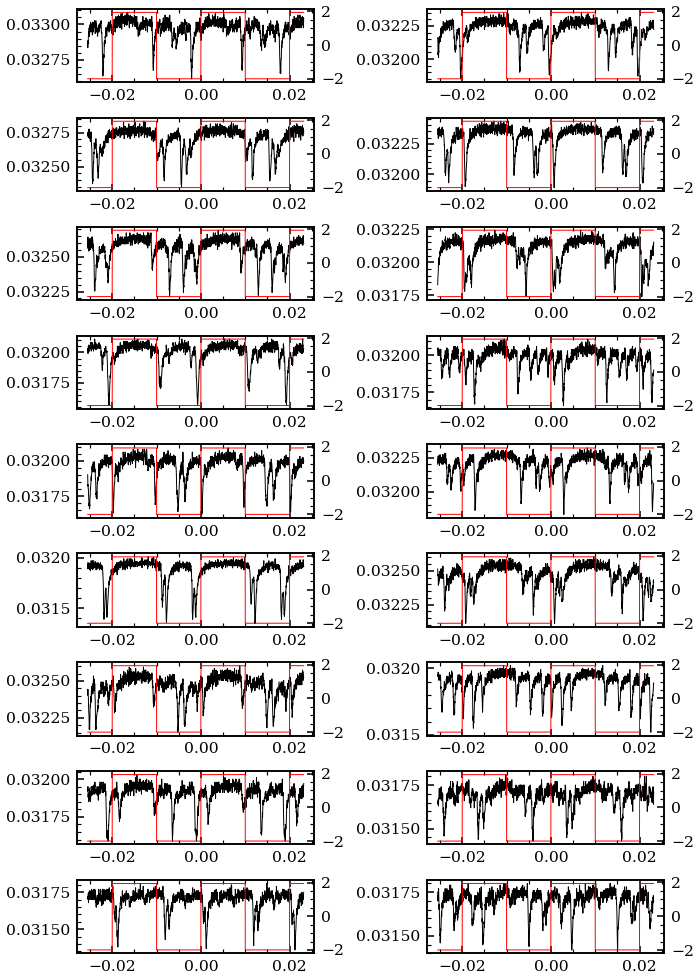

In [609]:
fig, ax = plt.subplots(9, 2, figsize=(5,7))
for i, file in enumerate(theta_file) : 
    data = np.loadtxt("./Zeeman/theta/" + file, delimiter=',', unpack=True, skiprows=2, max_rows=1950)
    if len(data) == 2 : 
        ax.flat[i].plot(data[0], data[1], label=f'$\theta = {theta[i]:.1f}$', lw = .5, color = 'k')
    else : 
        ax.flat[i].plot(data[0], data[2], label=f'$\theta = {theta[i]:.1f}$', lw = .5, color = 'k')
        ax2 = ax.flat[i].twinx()
        ax2.plot(data[0], data[1], label=f'$\theta = {theta[i]:.1f}$', lw = .5, color = 'r')

In [610]:
x_theta = [-.06, 
           -0.03, 
           -.05,
           -.03,
           -.06, 
           -.02,
           -.05,
           -.015,
           -.042,
           -.015,
           -.05,
           -.01,
           -.043,
           -.005,
           -.04,
            0, 
            -.04,
            0
           ]
x_theta = np.array(x_theta) / 10

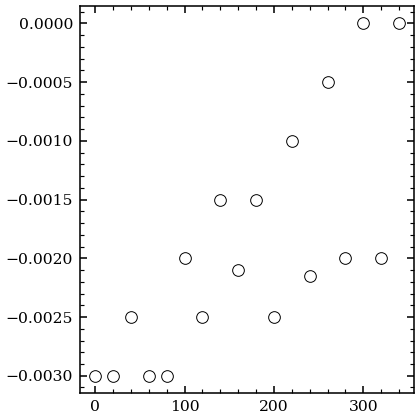

In [611]:
fig, ax = plt.subplots(figsize=(3,3))
mask = x_theta >= -.003
x_theta[~mask] = x_theta[~mask] /2
ax.plot(theta, x_theta, 'o', mfc = (0,0,0,0), mec = 'k', mew = .5)

In [612]:
def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        x0 = params[i]
        Gamma = params[i+1]
        A = params[i+2]
        y += A * (2 / (np.pi * Gamma)) / (1 + ((x - x0) / (Gamma / 2)) ** 2)
    return y

In [613]:
import scipy.signal
b, a = scipy.signal.butter(8, 0.14, 'low')

In [614]:
def delete_spikes_data(parameters, num_analyses, n_index) :
    for i, analyses in enumerate(num_analyses) : 
        parameters[analyses] = np.delete(parameters[analyses], np.concatenate([[n*3, n*3+1, n*3+2] for n in n_index[i]]))

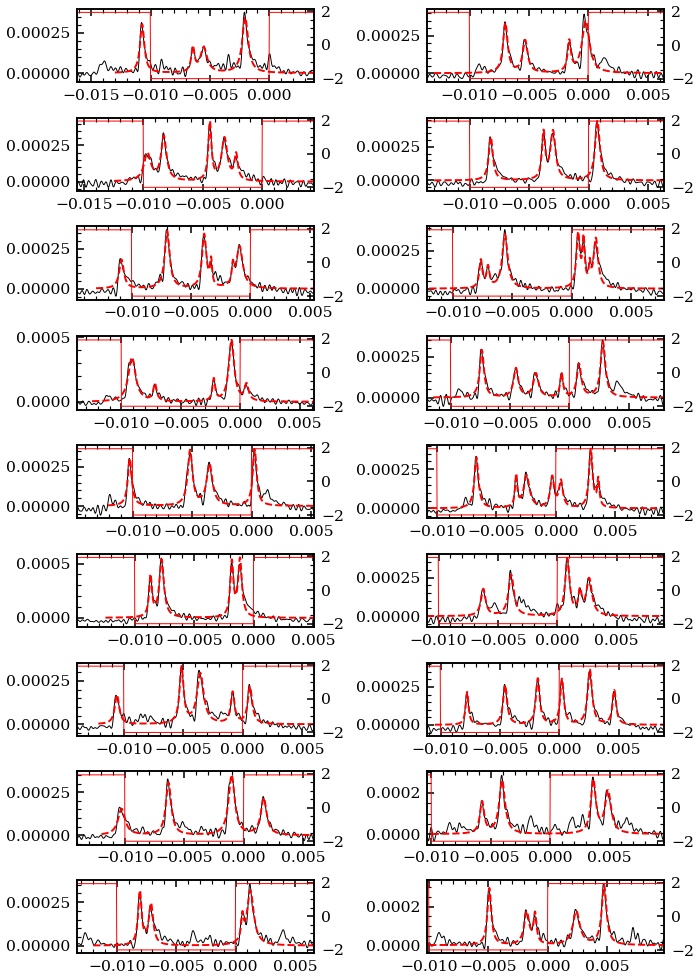

In [615]:
fig, ax = plt.subplots(9, 2, figsize=(5,7))
parameters = []
for i, file in enumerate(theta_file) : 
    
    data = np.loadtxt("./Zeeman/theta/" + file, delimiter=',', unpack=True, skiprows=2, max_rows=1950)
    data[2] = -(data[2] - data[2].mean())
    data[2] += 0.00005
    data[2] = scipy.signal.filtfilt(b, a, data[2])

    ax.flat[i].plot(data[0], data[2], label=f'$\theta = {theta[i]:.1f}$', lw = .5, color = 'k')
    ax2 = ax.flat[i].twinx()
    
    ax2.plot(data[0], data[1], label=f'$\theta = {theta[i]:.1f}$', lw = .5, color = 'r')
    
    mask = (data[0] > x_theta[i]-.01) & (data[0] < x_theta[i]+.01)
    i_pk, _ = scipy.signal.find_peaks(data[2][mask], height = (0.00013,0.001), width = (6,500), rel_height=0.5)
    
    
    initial_width = _['widths']*(data[0][1]-data[0][0])
    initial_amp = _['peak_heights']* initial_width 
    initial_pos = data[0][mask][i_pk]
        
    # if len(i_pk[i_pk >= len(data[2][mask]) // 2]) %2 == 1: # odd sipke number on left side
    #     min_peak = np.argmin(_['peak_heights'][i_pk >= len(data[2][mask]) // 2])  # find the smallest peak in the mask region
    #     min_peak +=  len(i_pk[i_pk <= len(data[2][mask]) // 2])
    #     i_pk = np.delete(i_pk, min_peak)
    #     initial_width, initial_amp, initial_pos = np.delete(initial_width, min_peak), np.delete(initial_amp, min_peak), np.delete(initial_pos, min_peak)

    # if len(i_pk[i_pk <=  len(data[2][mask]) // 2]) %2 == 1: # odd sipke number on right side
    #     min_peak = np.argmin(_['peak_heights'][i_pk <= len(data[2][mask]) // 2])  # find the smallest peak in the mask region
    #     print(i, min_peak)
    #     ax.flat[i].scatter(data[0][mask][i_pk[min_peak]], data[2][mask][i_pk[min_peak]], marker = 'o', color = 'b', s = 20, alpha = .6)
    #     ax.flat[i].axvline(data[2][mask][len(data[2][mask]) // 2],  color = 'k', lw = .5)
    #     i_pk = np.delete(i_pk, min_peak)
    #     initial_width, initial_amp, initial_pos = np.delete(initial_width, min_peak), np.delete(initial_amp, min_peak), np.delete(initial_pos, min_peak)
          
    # ax.flat[i].scatter(data[0][mask][i_pk], data[2][mask][i_pk], marker = 'o', color = 'r', s = 10, alpha = .4)
    # ax.flat[i].set_xlim(x_theta[i]-.01, x_theta[i]+.01)
    
    initial_data = np.ravel([[initial_pos[i], initial_width[i], initial_amp[i]] for i in range(len(initial_amp))])
    bounds_inf = np.ravel([[initial_pos[i]-.002, initial_width[i]/10, initial_amp[i] /2] for i in range(len(initial_amp))])
    bounds_sup = np.ravel([[initial_pos[i]+.002, initial_width[i]*1.2, initial_amp[i] *100] for i in range(len(initial_amp))])
    p_opt, p_cov = curve_fit(func, data[0][mask], data[2][mask], p0=initial_data, maxfev=10000, bounds= [bounds_inf, bounds_sup])
    parameters.append(p_opt)
    ax.flat[i].plot(data[0][mask],func(data[0][mask], *p_opt), '--', lw = 1, color = 'r')
    ax.flat[i].set_xlim(np.mean(initial_pos) -.01, np.mean(initial_pos) +.01)
        

In [616]:
delete_spikes_data(parameters, [2, 4, 5, 6, 9, 11, 12, 17], [[4], [3,4], [4], [4],[6], [3], [3], [2]])

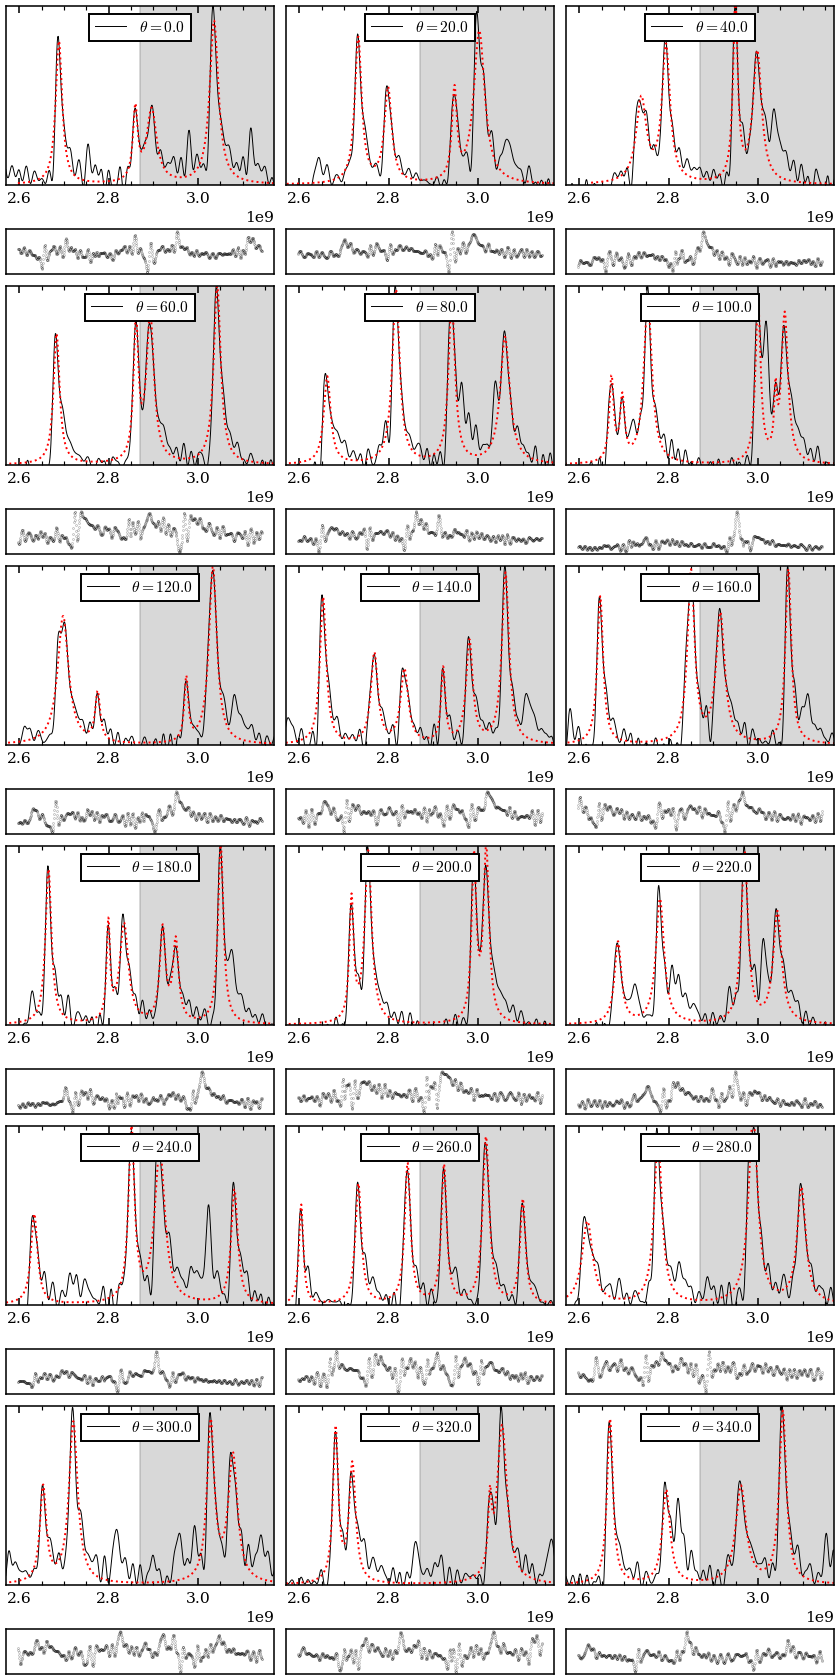

In [618]:
fig, ax = plt.subplots(6, 3, figsize=(6,12))
for i, file in enumerate(theta_file) : 
   pos = [parameters[i][k*3] for k in range(len(parameters[i]) // 3)]
   center = np.mean(pos)
   data = np.loadtxt("./Zeeman/theta/" + file, delimiter=',', unpack=True, skiprows=2, max_rows=1950)
   data[2] = -(data[2] - data[2].mean())
   data[2] += 0.00005
   data[2] = scipy.signal.filtfilt(b, a, data[2])
   freq = (data[0] - center)*.4e9 / 10e-3 + 2.87e9

   ax.flat[i].plot(freq, data[2], label=f'$\\theta = {theta[i]:.1f}$', lw = .5, color = 'k')
   mask = (data[0] > x_theta[i]-.01) & (data[0] < x_theta[i]+.01)
   ax.flat[i].plot(freq[mask],func(data[0][mask], *parameters[i]), ':', lw = 1, color = 'r')
   ax.flat[i].set_xlim(2.57e9, 3.17e9)
   ax.flat[i].set_yticks([])
   ax.flat[i].legend(loc = 'upper center')
   ax.flat[i].set_ylim(0, data[2].max())
   ax.flat[i].fill_between([2.87e9, 2.87e9 + 3e9], 0, 1, color = 'grey', alpha = .3)
   ax_res = ax.flat[i].inset_axes([0, -.5, 1, 0.25])
   ax_res.plot(freq[mask], data[2][mask] - func(data[0][mask], *parameters[i]), marker = 'o', lw = 0, color = 'k', ms = .1)
   ax_res.set_xticks([])
   ax_res.set_yticks([])
   plt.savefig('zeeman_theta.png', dpi = 300, bbox_inches='tight')

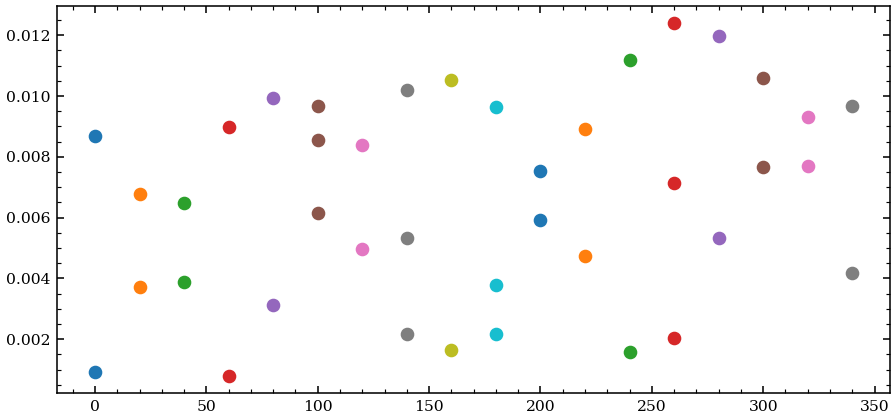

In [369]:
fig, ax = plt.subplots()
positions = []
for i in range(len(parameters)) : 
    pos = np.array([parameters[i][k*3] for k in range(len(parameters[i]) // 3)])
    n = len(pos)
    positions.append(pos[n//2:] - pos[:n//2][::-1])
for i in range(len(positions)) : 
    ax.scatter(theta[i] * np.ones(len(positions[i])), positions[i])


In [21]:
initial_data

array([-4.95000000e-03,  4.35450017e-04,  1.26385824e-07, -1.85000000e-03,
        6.09438614e-04,  1.11600069e-07, -1.12500000e-03,  2.43636379e-04,
        3.74930843e-08,  2.35000000e-03,  5.82289071e-04,  1.07762138e-07,
        4.70000000e-03,  4.81223824e-04,  1.53420932e-07])

In [510]:
def lorentzienne(x, x0, Gamma, A) : 
    return A * (2 / (np.pi * Gamma)) / (1 + ((x - x0) / (Gamma / 2)) ** 2)

In [511]:
def bi_lorentzienne(x, x0, Gamma, A, x1, Gamma1, A1) : 
    return lorentzienne(x, x0, Gamma, A) + lorentzienne(x, x1, Gamma1, A1)

In [50]:
sigma

0.9479020077532734

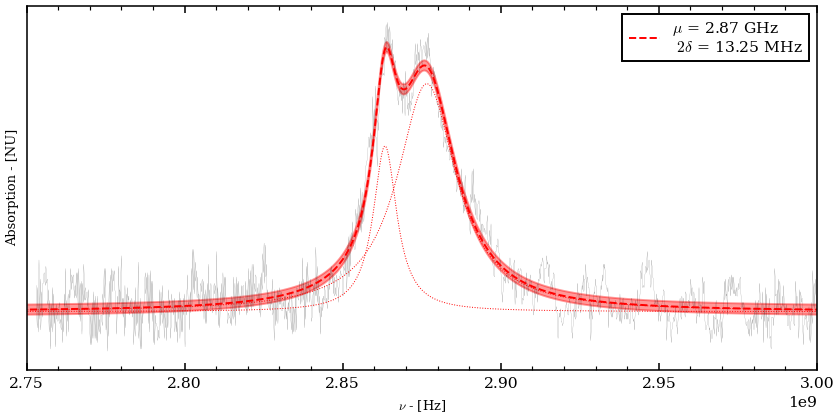

In [602]:
fig, ax = plt.subplots(figsize=(6,3))
data = np.loadtxt("./Zeeman/" + files[-2], delimiter=',', unpack=True, skiprows=2, max_rows=1950)

mask = abs(data[0] + 4.5e-3) < 1e-3
p_opt, p_cov = curve_fit(bi_lorentzienne, data[0][mask], -data[2][mask]  + .0384, p0=[-5e-3, 0, 1e-8, -4.6e-3, 0, 1e-8], maxfev=10000, bounds= [(-5e-3, 0, 1e-8, -4.6e-3, 0, 1e-8), (-4.6e-3, 1e-3, 1e-4, -4e-3, 1e-3, 1e-4)])

center = np.mean(p_opt[[0,3]])
ax.plot((data[0] - center)*.4e9 / 10e-3 + 2.87e9, -data[2]  + .0384, lw = .05, color = 'k')

sigma = np.sqrt(np.sum(np.diag(p_cov)))
ax.set_xlim(2.75e9, 3.0e9)
x = (np.linspace(-8e-3, -1e-3, 1000) - center)*.4e9 / 10e-3 + 2.87e9
x2 = np.linspace(-8e-3, -1e-3, 1000)
ax.plot(x,bi_lorentzienne(x2, *p_opt), '--', lw = 1, color = 'r', label = '$\\mu$ = %.2f GHz \n $2\\delta$ = %.2f MHz' % (2.87,(p_opt[3] - p_opt[0] )*.4e9 / 10e-3  /1e6))
ax.fill_between(x, bi_lorentzienne(x2, *p_opt) - sigma, bi_lorentzienne(x2, *p_opt) + sigma,  alpha = .4, color = 'r')
ax.axvline(p_opt[0] * .4e9 / 10e-3 , color = 'k', lw = .3, linestyle = '--')
ax.axvline(p_opt[3] * .4e9 / 10e-3, color = 'k', lw = .3, linestyle = '--')
ax.plot(x, lorentzienne(x2, *p_opt[:3]), ':', lw = .5, color = 'r')
ax.plot(x, lorentzienne(x2, *p_opt[3:]), ':', lw = .5, color = 'r')

ax.set_xlabel(r"$\nu $ - [Hz]")
ax.set_yticks([])
ax.set_ylabel("Absorption - [NU]")
ax.legend()

plt.savefig('zeeman.png', dpi = 300, bbox_inches='tight')

In [119]:
data2 = np.loadtxt("./Zeeman/" + files[-1], delimiter=',', unpack=True, skiprows=2, max_rows=1950)

In [120]:
mask2 = abs(data2[0] + 8e-3) < 5e-3

In [121]:
p_opt2, p_cov2 = curve_fit(bi_lorentzienne, data2[0][mask2], -data2[2][mask2]  +.0393, p0=[-1.1e-2, 1e-4, 1e-3, -5.5e-3, 1e-4, 1e-3], maxfev=10000, bounds= [(-1.2e-2, 1e-5, 1e-8, -6e-3, 1e-5, 1e-8), (-1e-2, 5e-3, 1e-2, -4e-3, 5e-3, 1e-2)])

In [122]:
p_opt3 = p_opt.copy()
p_opt3[[0,3]] = p_opt3[[0,3]] -  (p_opt[0] + p_opt[3]) / 2 + (p_opt2[0] + p_opt2[3]) / 2

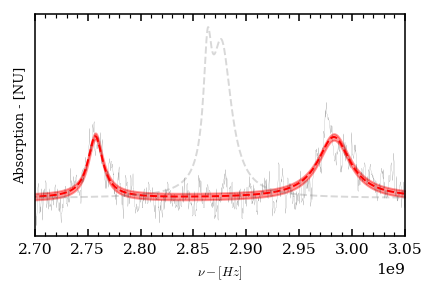

In [126]:
fig, ax = plt.subplots(figsize=(3,2))
mean = (p_opt2[0] + p_opt2[3]) / 2
ax.plot((data2[0][mask2] - mean)*.4e9 / 10e-3 + 2.87e9, -data2[2][mask2] +0.0393, label=file.split('.')[0], lw = .05, color = 'k')
x = np.linspace(-1.3e-2, -3e-3, 1000)

ax.plot((x - mean)*.4e9 / 10e-3 + 2.87e9,bi_lorentzienne(x, *p_opt2), '--', lw = 1, color = 'r', label = '$\\Gamma$ = %.2f MHz' % (p_opt[1] * 10 **3))
ax.fill_between((x - mean)*.4e9 / 10e-3 + 2.87e9, bi_lorentzienne(x, *p_opt2) - sigma, bi_lorentzienne(x, *p_opt2) + sigma,  alpha = .4, color = 'r')
ax.set_xlim(2.7e9, 3.05e9)
ax.plot((x- mean)*.4e9 / 10e-3 + 2.87e9, bi_lorentzienne(x, *p_opt3), '--', lw = 1, color = 'grey', label = '$\\Gamma$ = %.2f MHz' % (p_opt[1] * 10 **3), alpha = .3)
ax.fill_between((x- mean*.4e9 / 10e-3 + 2.87e9), bi_lorentzienne(x, *p_opt3) - sigma, bi_lorentzienne(x, *p_opt3) + sigma,  alpha = .1, color = 'grey')
ax.set_xlabel("$\\nu - [Hz]$")
ax.set_yticks([])
ax.set_ylabel("Absorption - [NU]")
plt.savefig('zeeman2.png', dpi = 300, bbox_inches='tight')

PROJECTIONS

In [598]:
array_tetra = np.array([
    [1,1,1],
    [1,-1, -1],
    [-1, 1, -1],
    [-1,-1, 1]
])
array_tetra = array_tetra /  np.linalg.norm(array_tetra, axis = 1)[:, None]

G = np.mean(array_tetra, axis = 0)
vector = array_tetra - G

In [594]:
%matplotlib widget

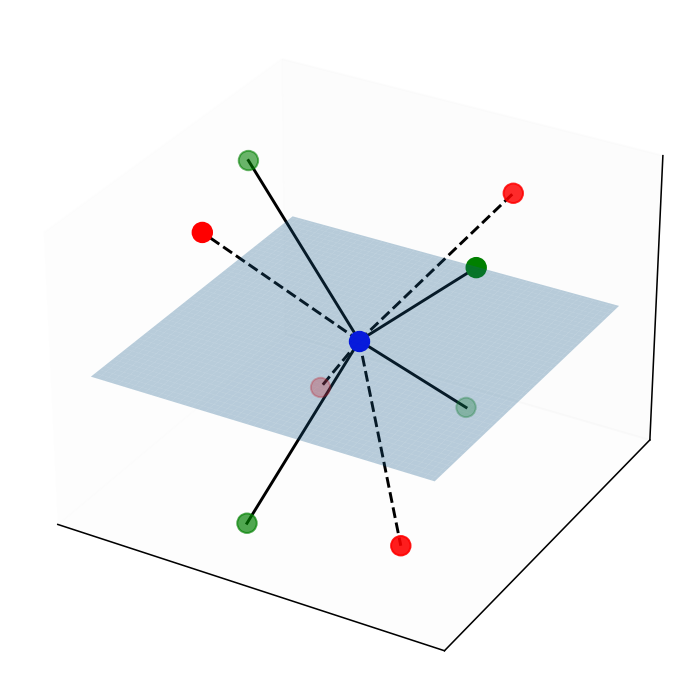

In [597]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(5,5))
ax.scatter(array_tetra[:,0], array_tetra[:,1], array_tetra[:,2], s = 100, color = 'r')
ax.scatter(G[0], G[1], G[2], s = 100, color = 'b')
ax.plot([G[0], G[0] + vector[0,0]], [G[1], G[1] + vector[0,1]], [G[2], G[2] + vector[0,2]], color = 'k', ls = '--')
ax.plot([G[0], G[0] + vector[1,0]], [G[1], G[1] + vector[1,1]], [G[2], G[2] + vector[1,2]], color = 'k', ls = '--')
ax.plot([G[0], G[0] + vector[2,0]], [G[1], G[1] + vector[2,1]], [G[2], G[2] + vector[2,2]], color = 'k', ls = '--')
ax.plot([G[0], G[0] + vector[3,0]], [G[1], G[1] + vector[3,1]], [G[2], G[2] + vector[3,2]], color = 'k', ls = '--')
plane = np.random.uniform(low = (-1,-1,0), high = (1, 1,0), size = (100,3)) - G
x,y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

ax.plot_surface(x,y, np.zeros_like(x), alpha = .3)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

rot = np.array([[np.cos(np.pi / 3), - np.sin(np.pi / 3),0], 
                [np.sin(np.pi / 3), np.cos(np.pi / 3),0],
                [0,0,1]])
array_rot = np.dot(array_tetra, rot)
ax.scatter(array_rot[:,0], array_rot[:,1], array_rot[:,2], s = 100, color = 'g')
vector2 = array_rot - G
ax.plot([G[0], G[0] + vector2[0,0]], [G[1], G[1] + vector2[0,1]], [G[2], G[2] + vector2[0,2]], color = 'k', ls = '-')
ax.plot([G[0], G[0] + vector2[1,0]], [G[1], G[1] + vector2[1,1]], [G[2], G[2] + vector2[1,2]], color = 'k', ls = '-')
ax.plot([G[0], G[0] + vector2[2,0]], [G[1], G[1] + vector2[2,1]], [G[2], G[2] + vector2[2,2]], color = 'k', ls = '-')
ax.plot([G[0], G[0] + vector2[3,0]], [G[1], G[1] + vector2[3,1]], [G[2], G[2] + vector2[3,2]], color = 'k', ls = '-')
plt.savefig('tetra.png', dpi = 300, bbox_inches='tight')

In [599]:
B = np.random.uniform(low = (-1,-1,0), high = (1, 1,0), size = (10000,3)) - G
B = B / np.linalg.norm(B, axis = 1)[:,None]
theta_2 = np.arctan2(B[:,1], B[:,0])
projection = np.dot(B, vector.T)

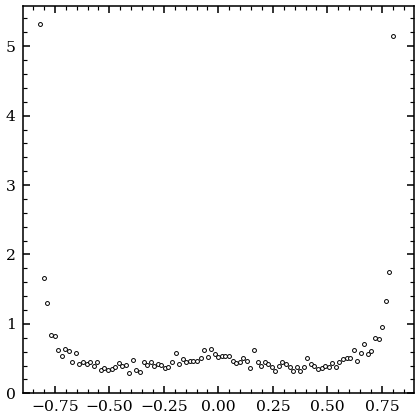

In [551]:
fig, ax = plt.subplots(figsize=(3,3))
n, bins, patch = ax.hist(projection[:,0], bins = 100, density=True, alpha = 0)
ax.plot(bins[:-1], n, lw = 0, color = 'k', marker = 'o', ms = 2, mfc = 'w', mew = .5)

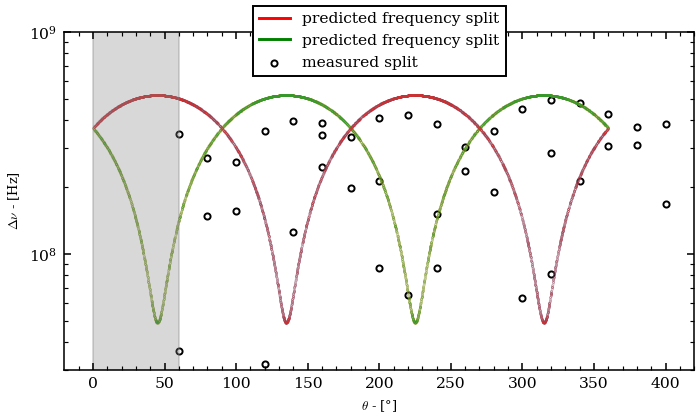

In [600]:
fig, ax = plt.subplots(figsize = (5,3))
positions = []
for i in range(len(parameters)) : 
    pos = np.array([parameters[i][k*3] * .4e9 / 10e-3 for k in range(len(parameters[i]) // 3)])
    n = len(pos)
    positions.append(pos[n//2:] - pos[:n//2][::-1]) # second spike on the right
     
for i in range(len(positions)) : 
    ax.scatter(60 +  theta[i] * np.ones(len(positions[i])), positions[i], s = 10, color = 'k', ec = 'k', fc = (0,0,0,0))
    
for i in range(4): 
    ax.scatter(180 + theta_2 * 180 / np.pi, 2 * np.sqrt( 1e17* projection[:,i] **2  + 6e14),  s= .001)

ax.set_yscale('log')
ax.set_ylim(3e7, 1e9)
ax.set_xlabel(r'$\theta$ - [°]')
ax.set_ylabel(r'$\Delta \nu$ - [Hz]')
ax.plot([], [], color = 'r', label = 'predicted frequency split')
ax.plot([], [], color = 'g', label = 'predicted frequency split')
ax.scatter([], [], s = 10, color = 'k', ec = 'k', fc = (0,0,0,0), label = 'measured split')
ax.fill_between([0,60], 0, 1e10, color = 'grey', alpha = .3)
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.1), ncol = 1)
plt.savefig('delta_freq_pred.png', dpi = 300, bbox_inches='tight')
